In [1]:
from utils.plot import plot_traintime_heatmap, plot_single_heatmap
import numpy as np
import pandas as pd

In [2]:
n_columns = np.arange(1000, 6000, 1000)
n_rows = n_columns
times1 = pd.read_csv("result/neofit_result/fast_floyd/time_results.csv")
times2 = pd.read_csv("result/neofit_result/standard_fisher/time_results.csv")

In [3]:
times1.head()

,time,dim,sample
0,229.619349,1000,1000
1,239.628258,1000,2000
2,250.760145,1000,3000
3,263.573195,1000,4000
4,274.767452,1000,5000


In [4]:
times1_reshaped = times1.pivot(index='dim', columns='sample', values='time')
times2_reshaped = times2.pivot(index='dim', columns='sample', values='time')
print(times1_reshaped)

sample        1000        2000        3000        4000        5000
dim                                                               
1000    229.619349  239.628258  250.760145  263.573195  274.767452
2000    318.579198  339.889969  358.518871  382.964824  404.032485
3000    427.782659  453.532923  509.761518  521.333115  551.849435
4000    587.467366  628.158995  662.230176  703.941828  745.856724
5000    788.246325  833.744509  869.556313  922.806180  969.743638


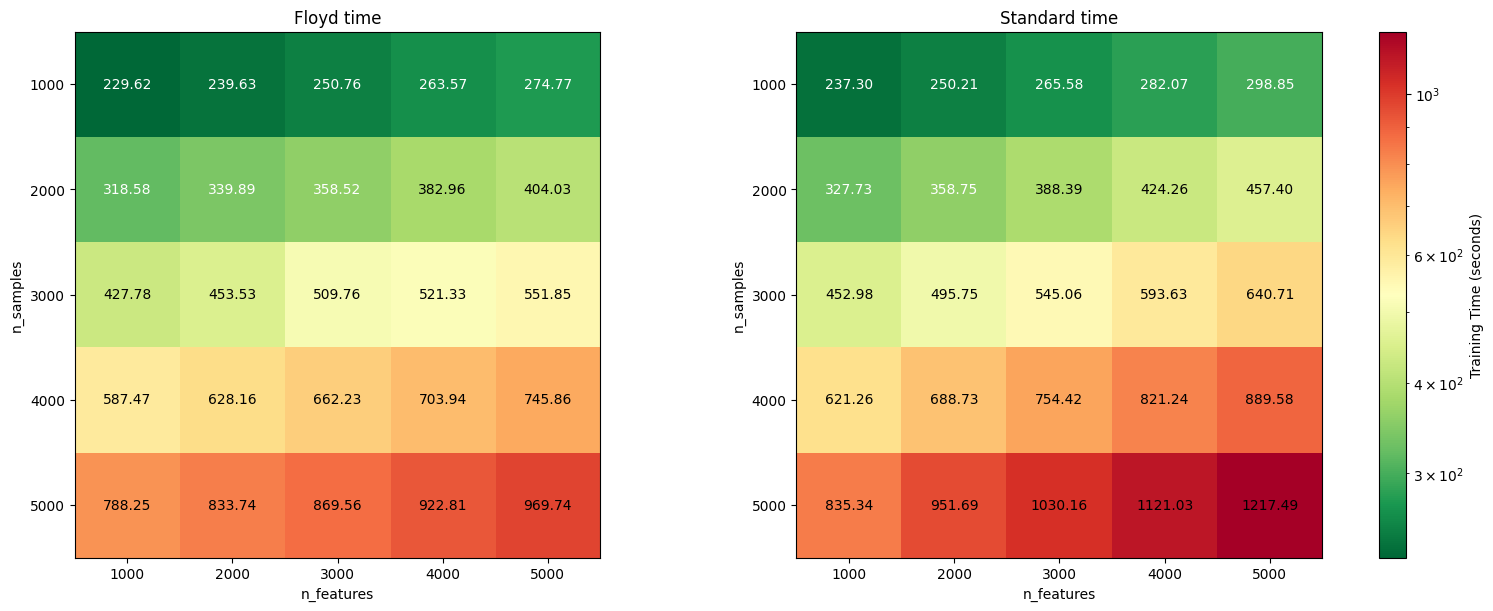

In [5]:
plot_traintime_heatmap(np.array(times1_reshaped), 
                        np.array(times2_reshaped), 
                        n_columns, 
                        n_rows,
                        title1="Floyd time",
                        title2="Standard time", 
                        xlabel="n_features", 
                        ylabel="n_samples", 
                        scale="linear")

sample      1000       2000       3000       4000       5000
dim                                                         
1000    3.235813   4.228002   5.581311   6.557897   8.058547
2000    2.791670   5.258449   7.690509   9.734395  11.666676
3000    5.561838   8.515749   6.475970  12.179052  13.868599
4000    5.439118   8.794303  12.220249  14.282905  16.156192
5000    5.637527  12.393153  15.590108  17.682437  20.349004


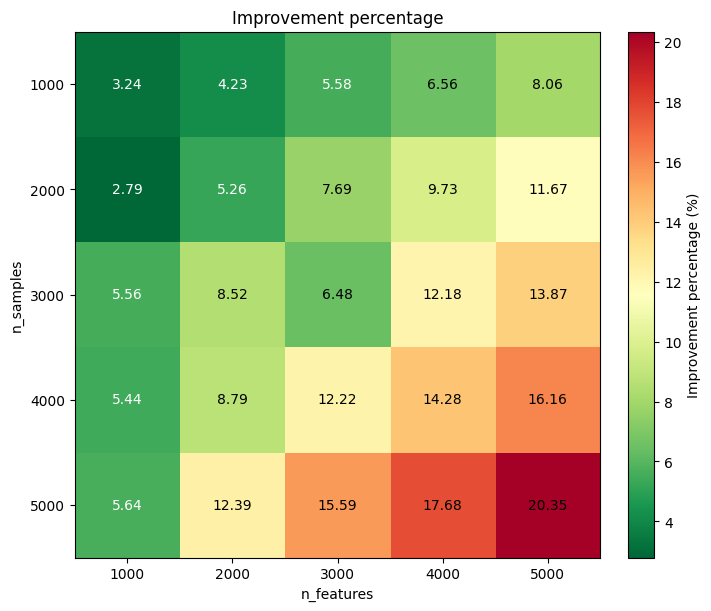

In [7]:
improvement_percentage = ((times2_reshaped - times1_reshaped) / times2_reshaped) * 100
print(improvement_percentage)
plot_single_heatmap(np.array(improvement_percentage), 
                     n_columns, 
                     n_rows,
                     title="Improvement percentage",
                     xlabel="n_features", 
                     ylabel="n_samples", 
                     scale="linear",
                     colorbar_label="Improvement percentage (%)")